In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [260]:
data = pd.read_csv('./AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [261]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']
data=np.array(data).reshape(-1,1)

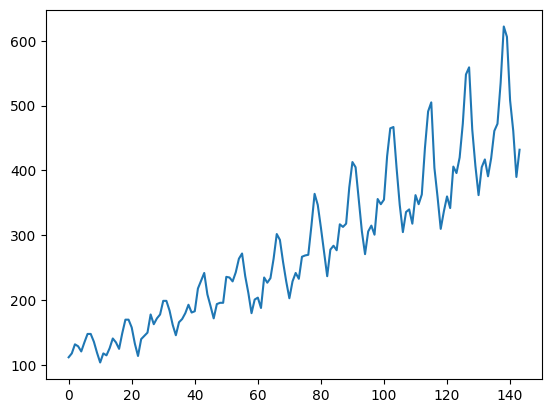

In [262]:
plt.plot(data)

In [263]:
scaler= MinMaxScaler()
data=scaler.fit_transform(data)

In [264]:
train_size=100
test_size=44

train=data[0:train_size,:]
test=data[train_size:,:]

In [265]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [266]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [267]:
X_train.shape

(98, 1)

In [270]:
X_test, y_test = get_data(test, look_back)

In [271]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construindo a rede LSTM

In [272]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [273]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [274]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
98/98 [==============================] - 3s 3ms/step - loss: 0.0394
Epoch 2/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 3/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 4/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 5/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 6/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 7/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 8/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 9/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 10/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 11/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 12/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 13/25
98/98 [==============================

In [275]:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 4ms/step


In [276]:
y_pred = scaler.inverse_transform(y_pred)

In [277]:
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

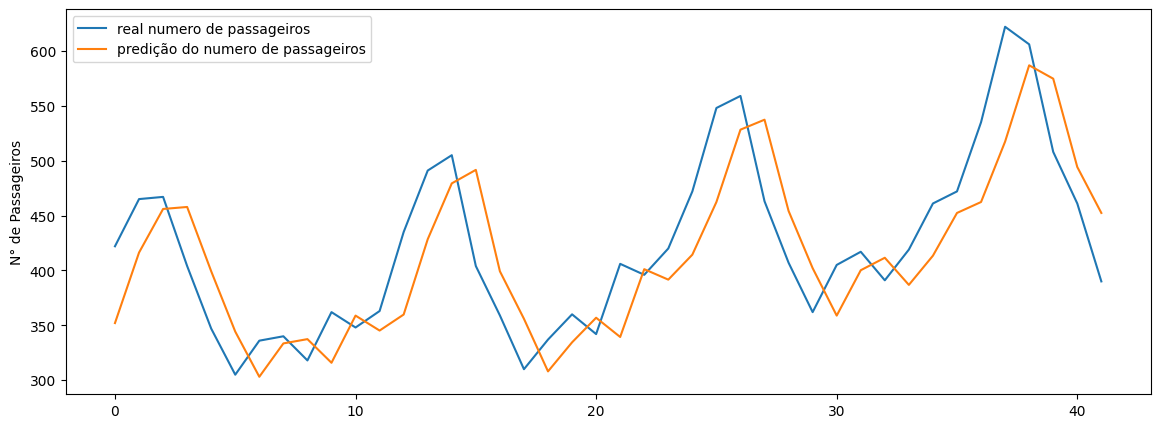

In [280]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real numero de passageiros')
plt.plot(y_pred, label = 'predição do numero de passageiros')
plt.ylabel('N° de Passageiros')
plt.legend()
plt.show()